### 문제정의
- 보스턴 주택 가격 데이터를 사용하여 주택 가격을 예측해보자
- 회귀모델
- LindarRegression, SGDRegressor

### 데이터 수집

In [156]:
import warnings
warnings.filterwarnings('ignore')

In [157]:
from sklearn.datasets import load_boston
boston=load_boston()

In [158]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [159]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

### 문제와 정답으로 구성
- DataFrame 형태로

In [160]:
import pandas as pd

In [161]:
# 문제 : X 
X=pd.DataFrame(boston['data'],columns=boston['feature_names'])
# 정답 : y
y=pd.DataFrame(boston['target'],columns=['price'])

In [162]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [163]:
y

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


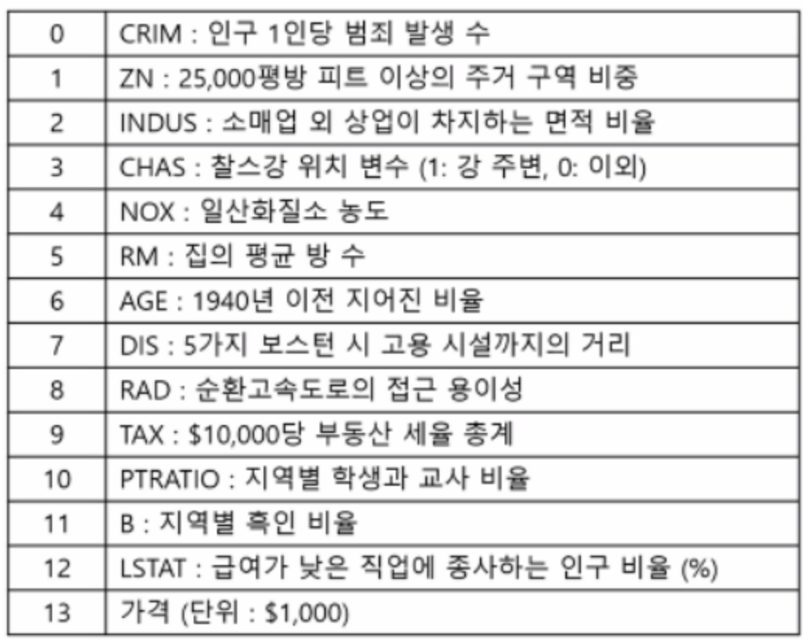

#### 데이터 합치기 (문제와 정답)

In [164]:
total=pd.concat([X,y],axis=1) # 열 방향으로 합침
total

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### 데이터 전처리
- 학습용 데이터로 일단 생략

#### 특성확장
- 특성들끼리 곱해서 새로운 특성을 만들자

#### 스케일링
- 주의사항 : 데이터 전처리 마지막에 사용 => 결측치가 없는 상태 

In [165]:
from sklearn.preprocessing import StandardScaler

In [166]:
# 모델 생성
standard=StandardScaler()

In [167]:
# 특성들이 가지고 있는 값의 범위를 파악
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [168]:
# 학습 
# 1. 값이 가지고 있는 범위를 파악
# 2. 어떻게 값을 변환해야 평균 0, 분산 1 이 되는지 파악 
standard.fit(X)

StandardScaler()

In [169]:
# 파악한 기준으로 변환
X_train=standard.transform(X)
X_train

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [170]:
col=X.columns
col

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [171]:
for i in range(col.size): # 전체 컬럼을 순서대로 꺼내오는 for 
    for j in range(i,col.size): # 어떤 컬럼을 곱할지 정하는 for 
        X[col[i]+'*'+col[j]]=X[col[i]]*X[col[j]] # 컬럼명으로 바로 추가하여 X 에 반영

In [172]:
# 크기확인
X.shape

(506, 104)

In [173]:
X.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       ...
       'TAX*TAX', 'TAX*PTRATIO', 'TAX*B', 'TAX*LSTAT', 'PTRATIO*PTRATIO',
       'PTRATIO*B', 'PTRATIO*LSTAT', 'B*B', 'B*LSTAT', 'LSTAT*LSTAT'],
      dtype='object', length=104)

In [174]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,TAX*TAX,TAX*PTRATIO,TAX*B,TAX*LSTAT,PTRATIO*PTRATIO,PTRATIO*B,PTRATIO*LSTAT,B*B,B*LSTAT,LSTAT*LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,87616.0,4528.8,117482.40,1474.08,234.09,6072.570,76.194,157529.6100,1976.5620,24.8004
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,58564.0,4307.6,96049.80,2211.88,316.84,7064.820,162.692,157529.6100,3627.6660,83.5396
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,58564.0,4307.6,95064.86,975.26,316.84,6992.374,71.734,154315.4089,1583.1049,16.2409
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,49284.0,4151.4,87607.86,652.68,349.69,7379.581,54.978,155732.8369,1160.2122,8.6436
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,49284.0,4151.4,88111.80,1183.26,349.69,7422.030,99.671,157529.6100,2115.4770,28.4089


### 탐색적 데이터 분석
- 상관관계 분석
    - 피어슨 상관계수 : 두 컬럼간의 선형도 판단 
    - 주로 선형함수에서 적용 
    
- 히트맵 : -1 ~ 1 (상관도)
    - -1에 가까울수록 음의 상관관계 : 반비례
    - +1에 가까울수록 양의 상관관계 : 정비례
    - 부호를 제외한 절대값이 1 에 가까울수록 상관도가 높다고 판단 

In [175]:
total.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


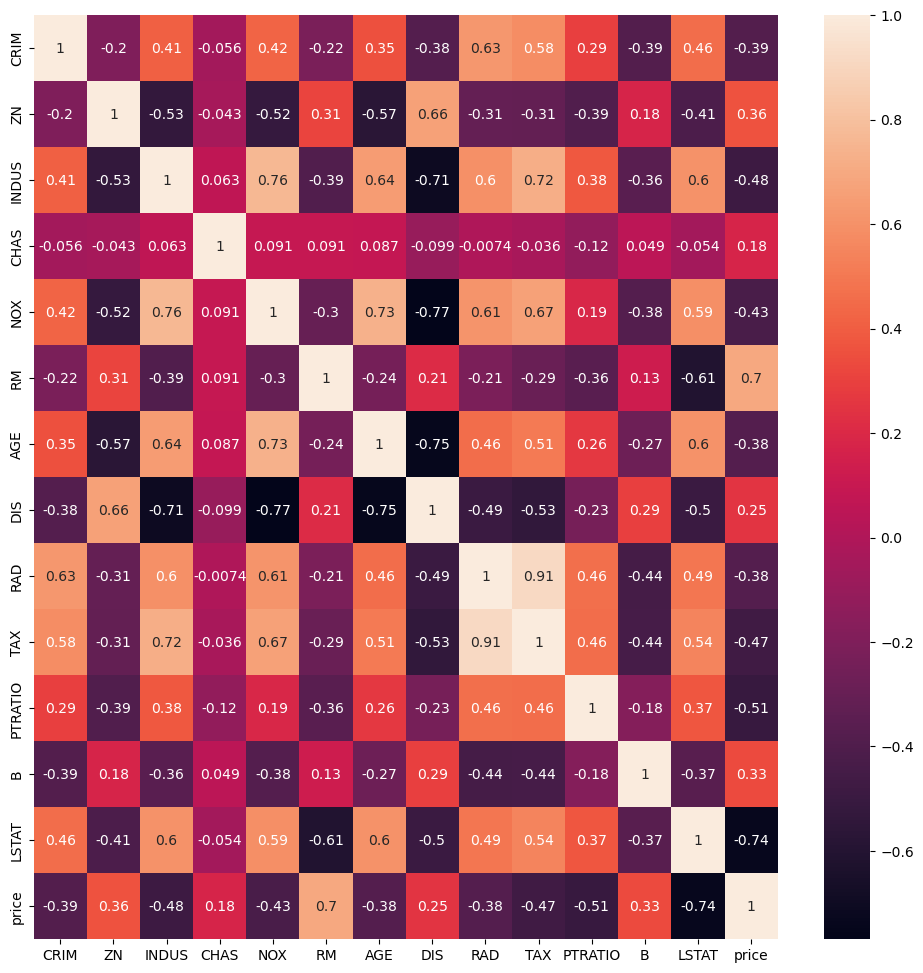

In [176]:
# 상관관계를 시각적으로 확인해보기 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
sns.heatmap(total.corr(),annot=True) # annot=True : 수치값 표현 
plt.show()

# 0 ~ 0.3 : 관계가 미미하다 
# 0.3 ~ 0.7 : 적당히 관계가 있음 => 일반적인 데이터를 가지고 왔을 때 거의 보기 힘든 경우 
# 0.7 ~ 1 : 관계가 아주 높다 

# 일반적인 수치상관계수보다는 뚜렷하게 차이를 확인 
# 데이터를 전처리 할 때 우선순위의 판단 근거로 사용할 수 있음 
# 1. 모델을 학습하는데 시간이 많이 걸린다 => 데이터를 줄일 필요가 있음. 
#     - 가지고 있는 컬럼중에서 상관도가 낮은 것을 삭제하고 학습 진행 
# 2. 추가적으로 전처리를 해야하는데 시간이 부족 
#     - 상관도가 높은 것부터 차례로 전처리를 진행하는게 더 효율적 

#### 규제를 적용시킨 모델

In [177]:
from sklearn.linear_model import Ridge, Lasso

### 모델 선택 및 하이퍼 파라미터 튜닝 

In [178]:
# 수학적 공식을 이용한 해석적 모델 
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()

# 경사하강법 
from sklearn.linear_model import SGDRegressor
sgd_model=SGDRegressor(eta0=0.00001,verbose=2)

# eta0 : 기본값 0.01 => 0.00001 로 변경하니 정상적인 범위의 값으로 출력 
# eta0 : 0.01 => 발산 
# loss 값으로 오차 확인 

### 학습

### 훈련과 평가데이터로 분리하기
- 훈련 7 : 평가 3 
- random_stats = 10 

**스케일링 미적용**

In [154]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,total.iloc[:,-1],
                                               test_size=0.3,random_state=10)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((354, 104), (152, 104), (354,), (152,))

**스케일링 적용**

In [179]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_train,total.iloc[:,-1],
                                               test_size=0.3,random_state=10)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [180]:
# 학습
lr_model.fit(X_train,y_train)
sgd_model.fit(X_train,y_train)

-- Epoch 1
Norm: 0.02, NNZs: 13, Bias: 0.024019, T: 354, Avg. loss: 279.808543
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 13, Bias: 0.040283, T: 708, Avg. loss: 279.259758
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 13, Bias: 0.054550, T: 1062, Avg. loss: 278.822944
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.04, NNZs: 13, Bias: 0.067628, T: 1416, Avg. loss: 278.431090
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.05, NNZs: 13, Bias: 0.079914, T: 1770, Avg. loss: 278.067958
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.05, NNZs: 13, Bias: 0.091587, T: 2124, Avg. loss: 277.725122
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.06, NNZs: 13, Bias: 0.102773, T: 2478, Avg. loss: 277.398482
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.07, NNZs: 13, Bias: 0.113561, T: 2832, Avg. loss: 277.084984
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.07, NNZs: 13, Bias: 0.124010, T: 3186, Avg. loss: 276.782416
To

SGDRegressor(eta0=1e-05, verbose=2)

### 예측 (평가)
- score : 회귀에서는 정확도가 아닌 모델의 성능 
- MSE 기반의 R**2 score 
- MSE 의 값의 범위 : 0 ~ 무한대 => R2score 
- R2score : 분산기반으로 예측 성능 평가, -1 ~ 1 
    - -1 에 가까울 경우 : 모델이 잘 설명을 못한다 (0 포함) 
    - +1 에 가까울 수록 : 모델이 잘 설명, 모델이 좋다 

In [181]:
lr_model.score(X_train,y_train)

0.7495400632086622

In [182]:
sgd_model.score(X_train,y_train)

-3.8639050251486298

In [183]:
lr_model.score(X_test,y_test)

0.6996255772983113

In [184]:
sgd_model.score(X_test,y_test)

-3.580751634245428

### 규제를 적용
- 하이퍼파라미터를 조정해가면서 학습과 평가를 한번에 확인 
- 각 모델을 함수화 

#### Ridge 활용하기

In [25]:
# Ridge 의 하이퍼파라미터 (alpha) 튜닝
def ridge_alpha(alpha):
    # 모델생성
    ridge=Ridge(alpha=alpha) # -무한대 ~ +무한대, 일반적으로 사용하는 구간 0.001 ~ 1000 
    # 학습
    ridge.fit(X_train,y_train)
    # 평가(예측) 
    print('train_score : ',ridge.score(X_train,y_train))
    print('test_score : ',ridge.score(X_test,y_test))

In [31]:
ridge_alpha(0.0001)

# 0.001 : test_score :  0.6996185188385615
# 0.01 : test_score :  0.699554978128172
# 1 : test_score :  0.6939805226890325
# 0.0001 : test_score :  0.6996248714720001

# alpha : 기본값 = 1 
# alpha 값이 증가 => 규제를 늘리겠다 => 모델이 복잡해지는 걸 막겠다 (과대적합일때 사용) 
# alpha 값이 감소 => 규제를 줄이겠다 => 모델이 단순해지는 걸 막겠다 (과소적합일때 사용) 

train_score :  0.749540063130461
test_score :  0.6996248714720001


#### Ridge 정리 
- 규제를 줄이니까 test score 가 상승
- 지금 상황이 과대적합보다는 과소적합이거나 일반화에 가까운 상황 
- 전체 데이터가 고루 중요할 때 사용 

#### Lasso 활용하기

In [33]:
import numpy as np

In [41]:
# Lasso 의 하이퍼파라미터 (alpha) 튜닝
def lasso_alpha(alpha):
    # 모델생성
    lasso=Lasso(alpha=alpha) # -무한대 ~ +무한대, 일반적으로 사용하는 구간 0.001 ~ 1000 
    # 학습
    lasso.fit(X_train,y_train)
    # 평가(예측) 
    print('train_score : ',lasso.score(X_train,y_train))
    print('test_score : ',lasso.score(X_test,y_test))
    
    # 사용한 특성의 수 
    print('사용한 특성의 수 : ',np.sum(lasso.coef_ !=0))

In [55]:
lasso_alpha(0.01)

# 1 : 사용한 특성의 수 :  11
# 0.01 : 사용한 특성의 수 :  13
# 0.001 : 사용한 특성의 수 :  13

# 규제를 늘릴수록 값이 잘 안나옴 
# 규제를 줄일수록 값이 잘 나왔음 
# 과대적합보다는 일반화 상황임 

# 규제항을 변경할때마다 사용된 특성의 수도 확인 가능 

train_score :  0.749077810854496
test_score :  0.6966502079097381
사용한 특성의 수 :  13


#### Lasso 정리
- 규제를 적용할수록 test score 값이 낮아짐 
- 규제를 적용할수록 사용하는 특성의 수도 감소 
- 특정 데이터(변수)가 중요할 때 사용